In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [27]:
df.groupby('y')['balance'].mean()

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [28]:
df.groupby('y')['balance'].mean().index

Index([u'no', u'yes'], dtype='object', name=u'y')

In [22]:
from scipy.stats import zscore
S=(df.groupby('y')['balance'].mean())
pd.Series(zscore(S, ddof=1), S.index)


y
no    -0.707107
yes    0.707107
dtype: float64

In [29]:
from scipy.stats import chi2_contingency
# compare categoricals

In [8]:
# from the above we see a miz of categorical and continuous variables.
# among the numerical data, an initial summary of stats develops a picture of the data set
# below, grouping by the target variable visually and by summary helps draw out some differences

y
no     [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
yes    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

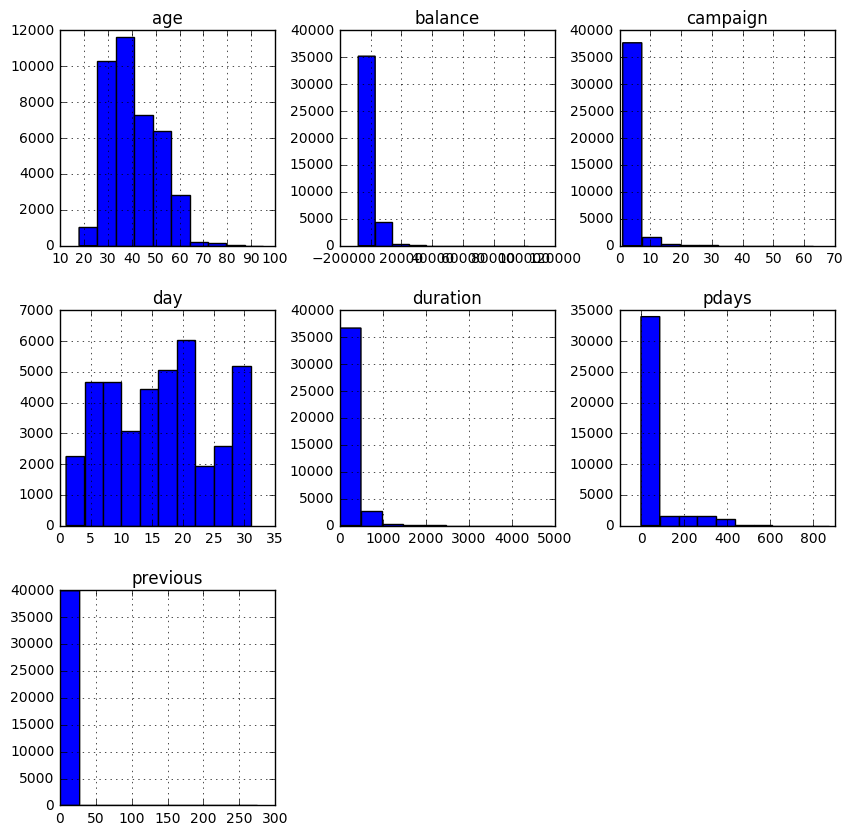

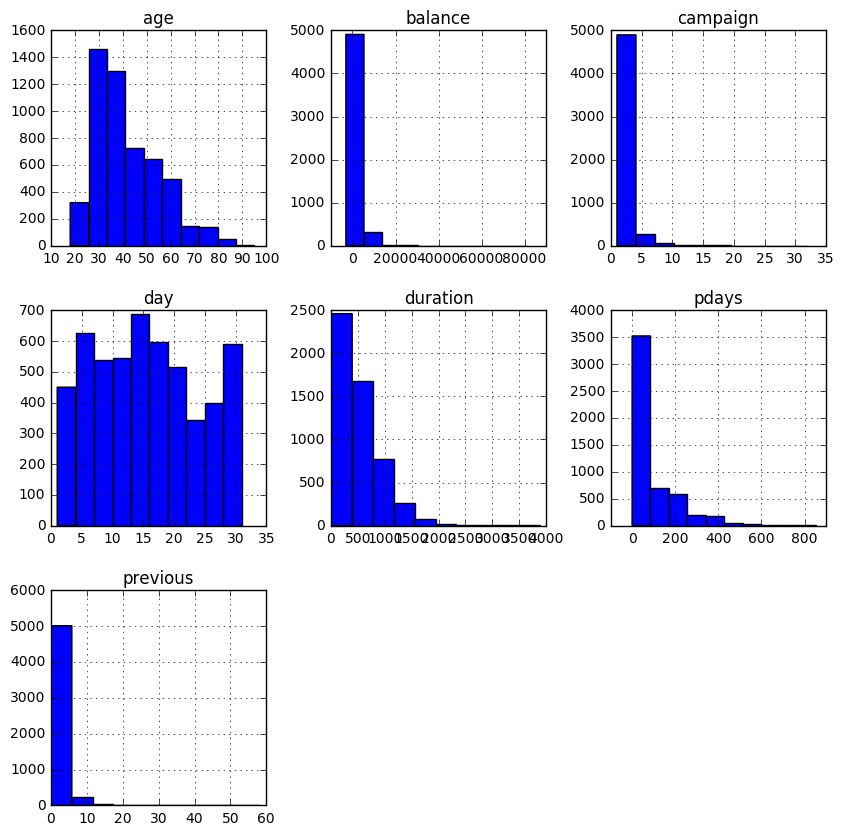

In [7]:
df.groupby('y').hist(figsize=(10,10))

In [8]:
df.y.value_counts() / len(df.y) * 100
# classes are quite unbalanced

no     88.30152
yes    11.69848
Name: y, dtype: float64

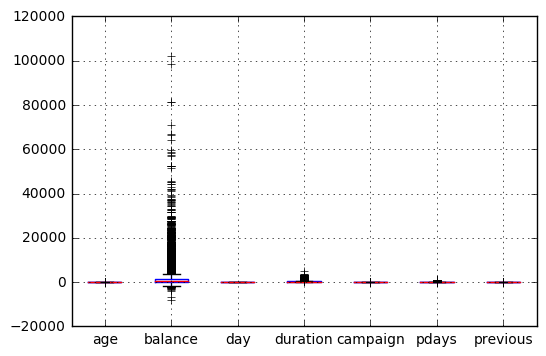

In [9]:
df.boxplot()
# need to look at these individually

no          Axes(0.1,0.15;0.363636x0.75)
yes    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

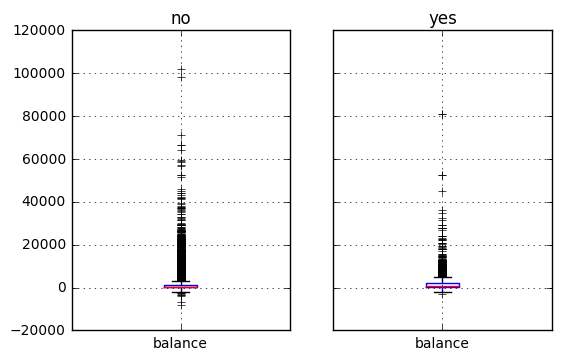

In [10]:
df.groupby('y').boxplot(column="balance")

no          Axes(0.1,0.15;0.363636x0.75)
yes    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

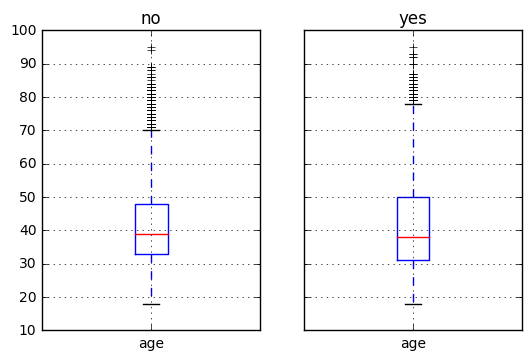

In [11]:
df.groupby('y').boxplot(column="age")

no          Axes(0.1,0.15;0.363636x0.75)
yes    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

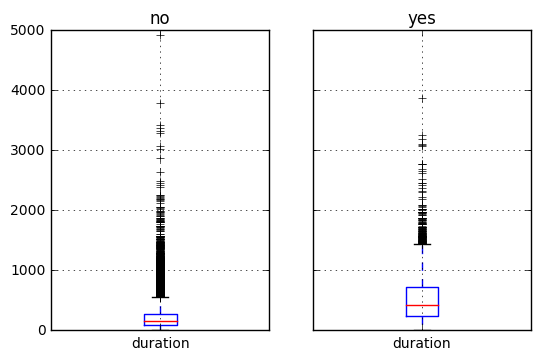

In [12]:
df.groupby('y').boxplot(column="duration")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1140c7cd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117a1d410>]], dtype=object)

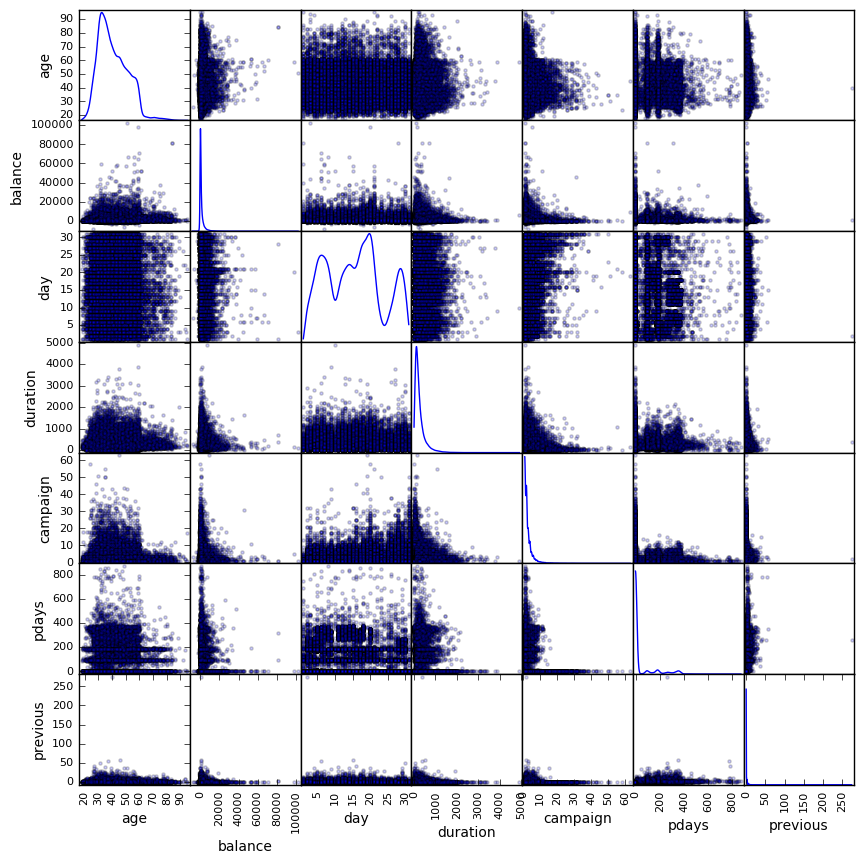

In [13]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal='kde')
# correlation between variables

In [19]:
df.pivot_table(df,index=['y'], aggfunc='mean')

,age,balance,campaign,day,duration,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,2.846350,15.892290,221.182806,36.421372,0.502154
yes,41.670070,1804.267915,2.141047,15.158253,537.294574,68.702968,1.170354


In [ ]:
#df.groupby('y', axis=0).mean()
#df.groupby('y', axis=0).std()
# Run cross val exploration on a number of other models as a check on model selection

In [23]:
pd.crosstab(df.y, df.job, margins=True)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown,All
y,,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254,39922
yes,631,708,123,109,1301,516,187,369,269,840,202,34,5289
All,5171,9732,1487,1240,9458,2264,1579,4154,938,7597,1303,288,45211


In [24]:
pd.crosstab(df.y, df.marital, margins=True)

marital,divorced,married,single,All
y,,,,
no,4585,24459,10878,39922
yes,622,2755,1912,5289
All,5207,27214,12790,45211


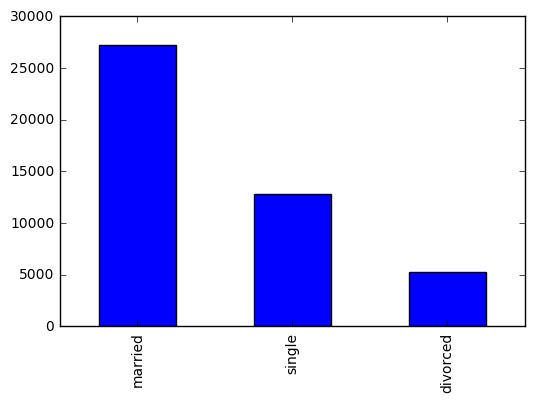

In [25]:
df.marital.value_counts().plot(kind='bar')

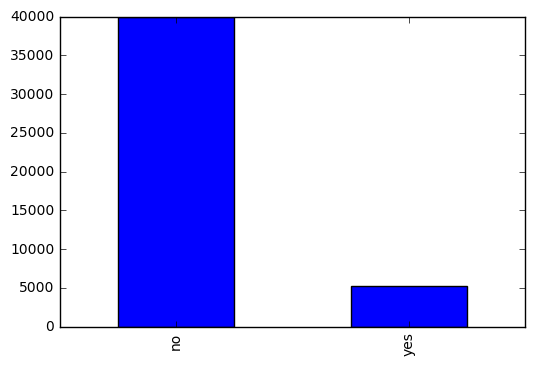

In [26]:
df.y.value_counts().plot(kind='bar')

In [27]:
df.groupby(['y', 'marital']).size().unstack(fill_value=0)

marital,divorced,married,single
y,,,
no,4585,24459,10878
yes,622,2755,1912


In [28]:
# t-test of independence
from scipy.stats import ttest_ind

cat1 = df[df['y']=='yes']
cat2 = df[df['y']=='no']


In [29]:
ttest_ind(cat1['age'], cat2['age'])

Ttest_indResult(statistic=5.3502554230362032, pvalue=8.825643691922395e-08)

In [30]:
ttest_ind(cat1['duration'], cat2['duration'])

Ttest_indResult(statistic=91.289436126708623, pvalue=0.0)

In [31]:
ttest_ind(cat1['previous'], cat2['previous'])

Ttest_indResult(statistic=19.910901271473993, pvalue=7.8018303498052108e-88)

In [32]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [33]:
null_data = df[df.isnull().any(axis=1)]

In [34]:
null_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [35]:
# ok, no missing values

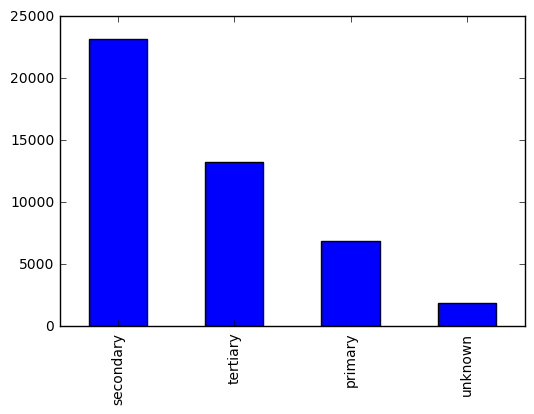

In [36]:
df.education.value_counts().plot(kind='bar')

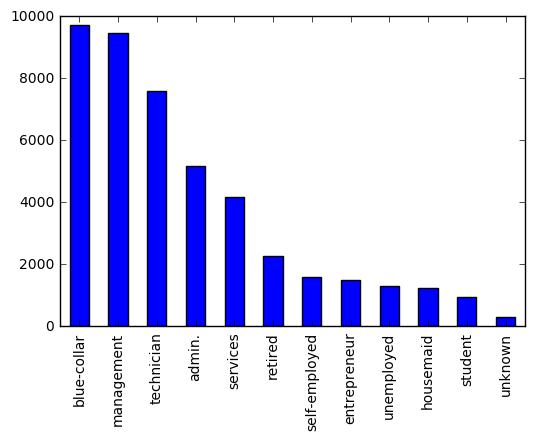

In [37]:
df.job.value_counts().plot(kind='bar')

In [38]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

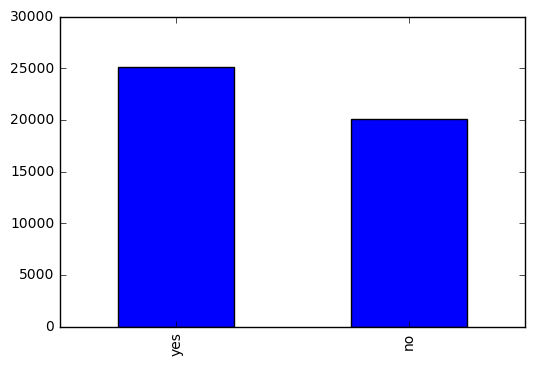

In [39]:
df.housing.value_counts().plot(kind='bar')

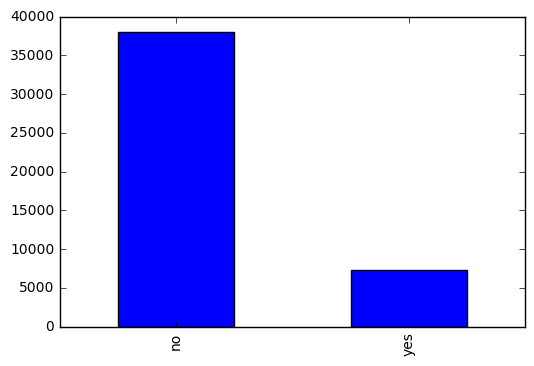

In [40]:
df.loan.value_counts().plot(kind='bar')

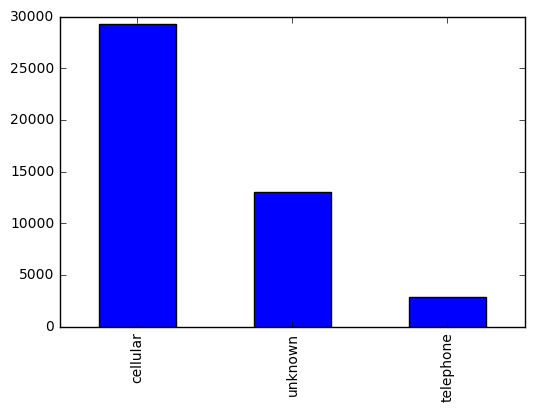

In [41]:
df.contact.value_counts().plot(kind='bar')

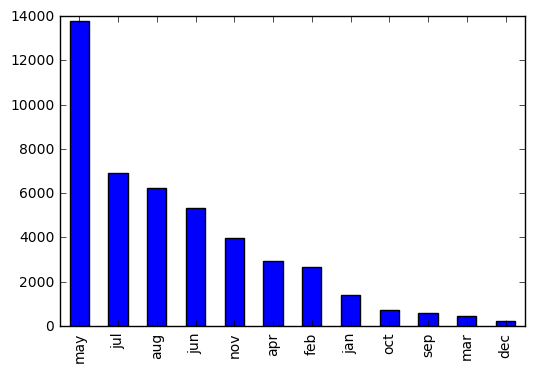

In [42]:
df.month.value_counts().plot(kind='bar')

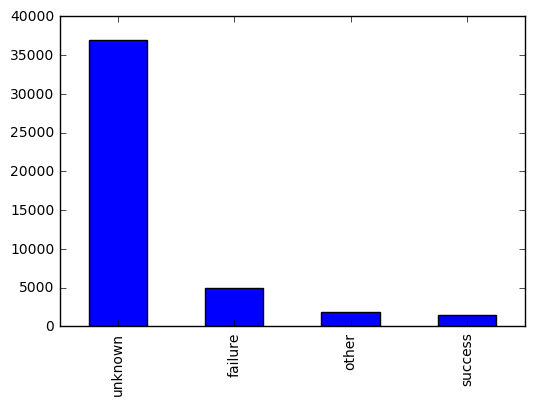

In [43]:
df.poutcome.value_counts().plot(kind='bar')

In [44]:
# data is describes as 'unknown'
# leaving it in as its own category in a first pass

In [45]:
df_with_dummies = pd.get_dummies(df, columns = categorical_cols , prefix= categorical_cols, drop_first=True)

In [46]:
df_with_dummies.head(5)

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,0,1,0,0,0,0,0,1


In [47]:
df_with_dummies['y'] = df_with_dummies['y'].map(dict(yes=1, no=0))

In [48]:
df_with_dummies.head(5)

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [49]:
list(df_with_dummies)

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [50]:
# not needed
#cols_to_drop = categorical_cols
#def drop_cols(df, col_list):
#	for i in col_list:
#		df.drop(i, axis=1, inplace=True)

In [51]:
#drop_cols(df_with_dummies, categorical_cols)
#dummies code seems to take care of it.

In [52]:
#cols = df_with_dummies.columns.tolist()

In [53]:
#cols.insert(0, cols.pop(cols.index('y')))

In [54]:
#cols

In [55]:
X = df_with_dummies.drop('y', axis=1)
y = df_with_dummies['y']

In [56]:
len(X)

45211

In [57]:
# Base classifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
kfold = KFold(n_splits=10)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())

Accuracy: 0.889 (0.112)


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=7)

from sklearn.metrics import log_loss, roc_auc_score, f1_score, accuracy_score


In [59]:
fit = model.fit(X_train, y_train)

In [60]:
pred = model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

print("="*80)
print("\nLogistic regression performance on unseen data:")
print("\nlog-loss: %.4f" % log_loss(y_test, pred))
print("\nAUC: %.4f" % roc_auc_score(y_test, pred))
print("\nF1 score: %.4f" % f1_score(y_test, pred))
print("\nAccuracy: %.4f" % accuracy_score(y_test, pred))

print"\nConfusion matrix:" 
print confusion_matrix(y_test, pred)
print"\nClassification report:"
print classification_report(y_test, pred)
print("="*80)


Logistic regression performance on unseen data:

log-loss: 3.3751

AUC: 0.6661

F1 score: 0.4619

Accuracy: 0.9023

Confusion matrix:
[[19449   506]
 [ 1703   948]]

Classification report:
             precision    recall  f1-score   support

          0       0.92      0.97      0.95     19955
          1       0.65      0.36      0.46      2651

avg / total       0.89      0.90      0.89     22606



In [ ]:
# Very poor on the target y = 1

In [ ]:

from sklearn import tree
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import svm

print "\nDECISION TREE\n"
decision_tree_clf = tree.DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree_clf, X, y, cv=kfold)
print "Mean: {}".format(decision_tree_scores.mean())
print "Std Dev: {}".format(np.std(decision_tree_scores))

print "\nRANDOM FOREST\n"
random_forest_clf = ensemble.RandomForestClassifier(n_estimators=5)
random_forest_scores = cross_val_score(random_forest_clf, X, y, cv=kfold)
print "Mean: {}".format(random_forest_scores.mean())
print "Std Dev: {}".format(np.std(random_forest_scores))

print "\nkNN\n"
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=7)
knn_scores = cross_val_score(knn_clf, X, y, cv=kfold)
print "Mean: {}".format(knn_scores.mean())
print "Std Dev: {}".format(np.std(knn_scores))

print "\nSVC\n"
svc_clf = svm.LinearSVC(C=50)
svc_scores = cross_val_score(svc_clf, X, y, cv=kfold)
print "Mean: {}".format(svc_scores.mean())
print "Std Dev: {}".format(np.std(svc_scores))